<a href="https://colab.research.google.com/github/pavithra64/pavithra64/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR DATA**

Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings;
warnings.filterwarnings('ignore')

Importing the files:

In [2]:
from google.colab import files
uploaded=files.upload()


Saving HR Data.csv to HR Data.csv


In [3]:
df=pd.read_csv('HR Data.csv')

summary of data

In [4]:
df.head()        #first 5 rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail()         #last 5 rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
print(df.shape)        #no. of rows and columns present in the dataset

(1470, 35)


In [7]:
df.columns             #fetches the title of columns in the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()           #information about dataset like non-null values, dtype& memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.nunique()           #no. of unique values in the dataset

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
df.describe()         #gives statistical information about the dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


std of EmployeeCount and standardhours are 0.0 which means there is no deviation from the mean i.e, all data points are the same.

In [11]:
df.describe(include="O")                 #returns a summary of the categorical data in each column

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


over 18 column has one unique value. so no analysis can be done on it.

In [12]:
df.isna().sum()             #returns the count of null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the data.

**Target column=ATTRITION**

ATTRITION "YES"=>  Employee wants to leave the company.

ATTRITION="NO=> Employee don't want to leave the company.


We are going to analyze how other features of dataset affects the attrition.

1. AGE
2. BUSINESS TRAVEL
3. DEPARTMENT
4. DISTANCE FROM HOME
5. RATING
6. EDUCATIONAL FIELD
7. JOB SATISFACTION
8. JOB INVOLVEMENT
9. JOB LEVEL
10. PERFORMANCE RATING
11. MONTHLY INCOME
12. PERCENTAGE SALARY HIKE


# **EXPLORATORY DATA ANALYSIS**


# 1.IMPACT OF BUSINESS TRAVEL ON ATTRITION

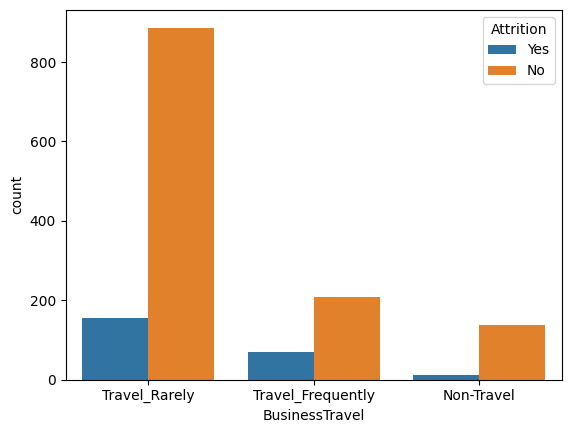

In [13]:
sns.countplot(hue=df.Attrition,x=df.BusinessTravel)
plt.show()

we infer that the company has more number of employees who travels rarely. It means the travel rate of the company is less.

 Most of the employees who travel rarely are not satisfies with their job.

 Non-travellers are less in count as well as attrition.

# 2. IMPACT OF DEPARTMENT ON ATTRITION:

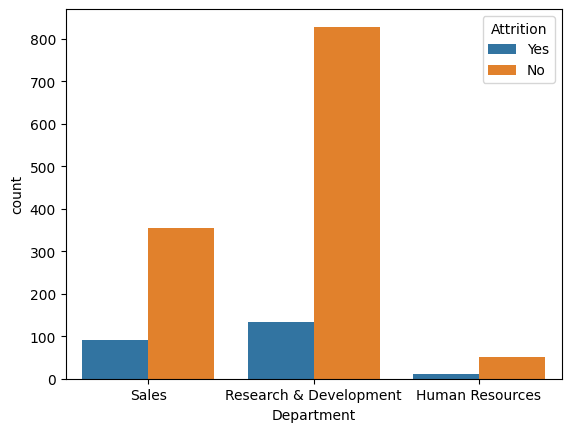

In [14]:
sns.countplot(hue=df.Attrition,x=df.Department)
plt.show()

There are 3 deartments namely sales, research& development and human resources.

Research and development department have more number of attrition compared to other 2 departments.


# 3. IMPACT OF EDUCATION FIELD ON ATTRITION



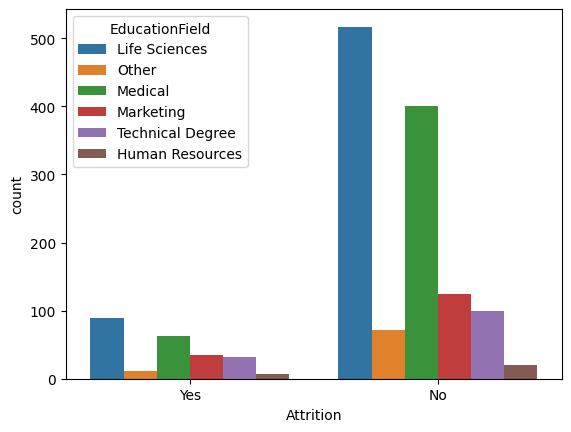

In [15]:
sns.countplot(x=df.Attrition,hue=df.EducationField)
plt.show()

Employees from life sciences and medical field are more as compared to other educational fields.

# 4.GENDER AND ATTRITION

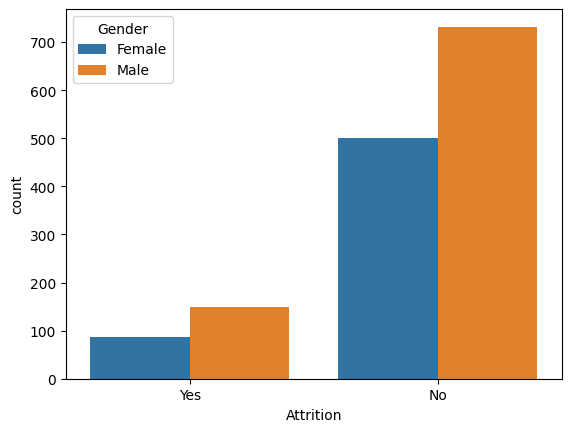

In [16]:
sns.countplot(hue=df.Gender,x=df.Attrition)
plt.show()

Males are more likely to leave their jobs compared to females.

# 5.OVERTIME AND ATTRITION

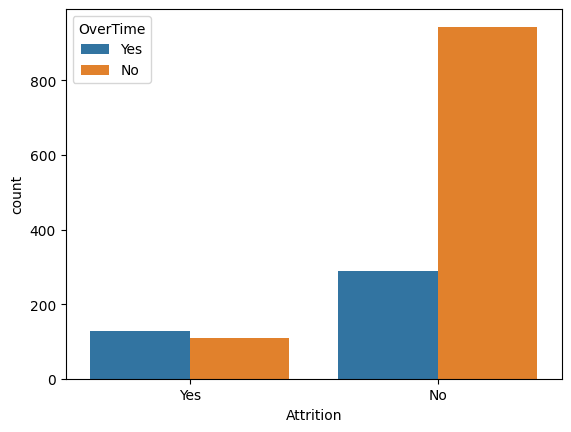

In [17]:
sns.countplot(hue=df.OverTime,x=df.Attrition)
plt.show()

Overtime has no much effect on attrition. Most of the employees are not doing overtime.

# 6. IMPACT OF JOB ROLE ON ATTRITION

Text(0.5, 0, 'JobRole')

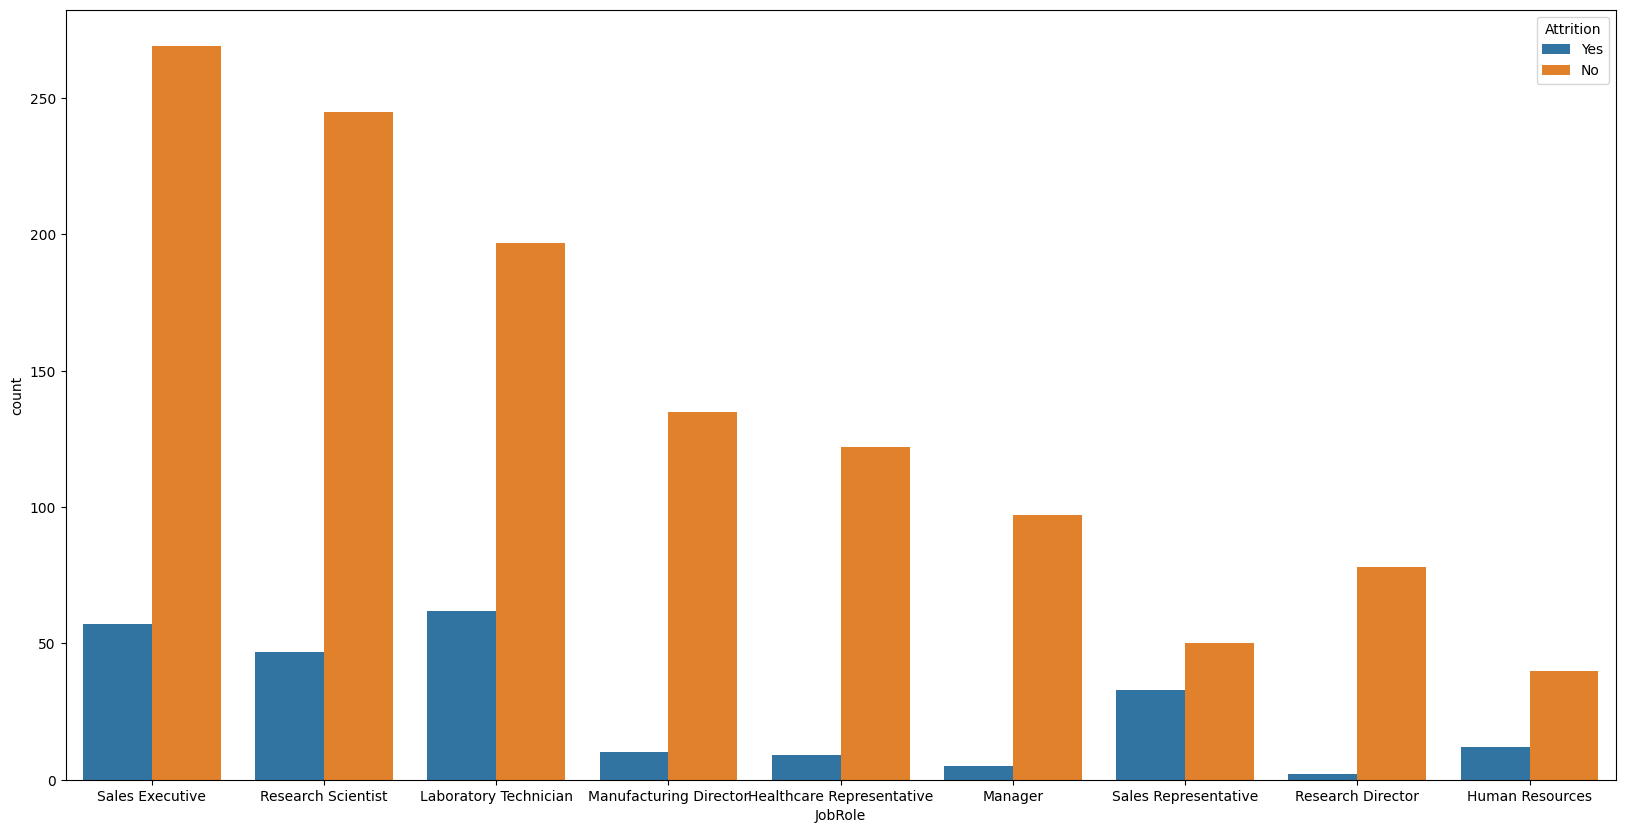

In [18]:
plt.figure(figsize=(20,10),facecolor="white")
sns.countplot(x=df.JobRole,hue=df.Attrition)
plt.xlabel('JobRole',fontsize=10)

There are less number of research directors who leave the company. Laboratory technician, sales executive and research scientist are top 3 jobes roles of employees with Attrition "yes".

# ANALYSIS ON CONTINUOUS DATA WRT TARGET COLUMN

In [19]:
numerical_col=[]
for column in df.columns:
   if df[column].dtype=="int64" and len(df[column].unique())>=10:

    numerical_col.append(column)

In [20]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# 1.IMPACT OF AGE ON ATTRITION

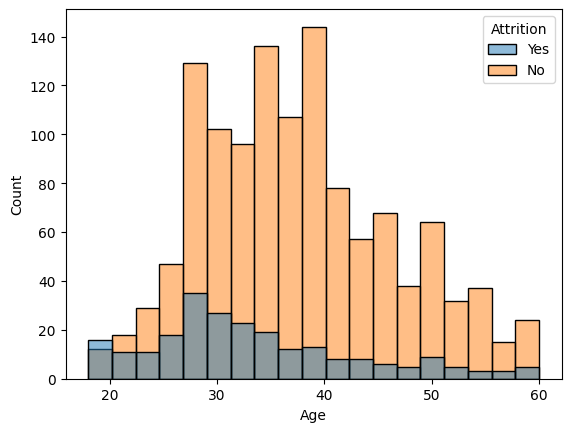

In [21]:
sns.histplot(hue=df.Attrition,x=df.Age)
plt.show()

Employees in the age group of 25 to 35 are more likely to leave.

# 2.DISTANCE FROM HOME AND ATTRITION

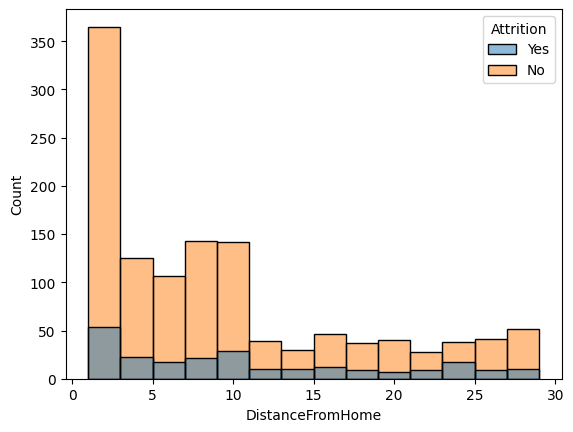

In [22]:
sns.histplot(hue=df.Attrition,x=df.DistanceFromHome)
plt.show()

Employees who has distance range of 0-10km are more likely to leave.Lesser the distance, more number of employees are working.

# 3. HOW MONTHLY INCOME GIVES TRENDS WRT ATTRITION

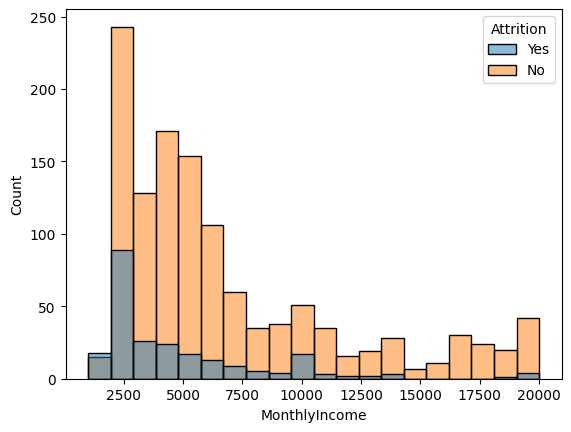

In [23]:
sns.histplot(hue=df.Attrition,x=df.MonthlyIncome)
plt.show()

Higher the monthly income, lesser the Attrition. Employees who have monthly income lesser than 2500 are more likely to leave.

# 4. IMPACT OF NO. OF COMPANIES WORKED

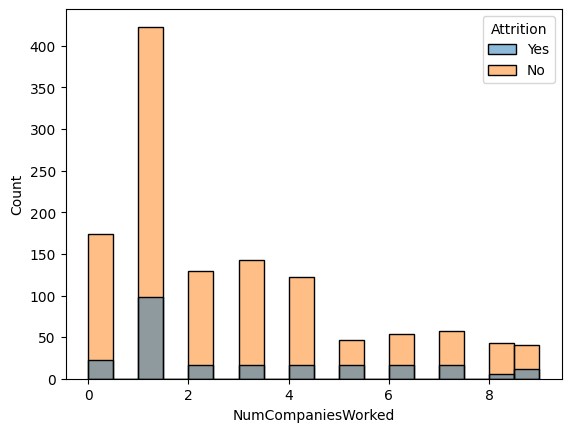

In [24]:
sns.histplot(hue=df.Attrition,x=df.NumCompaniesWorked)
plt.show()

Only the employees who worked in 1 company before are more likely to leave.

# 5. IMPACT OF SALARY HIKE ON ATTRITION

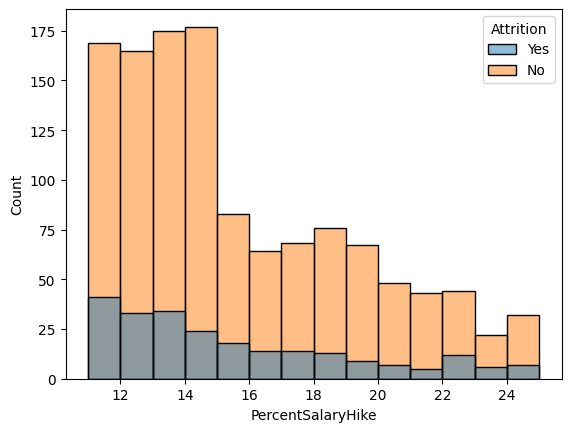

In [25]:
sns.histplot(hue=df.Attrition,x=df.PercentSalaryHike)
plt.show()

Higher the hike in salary, lesser the attrition.

# 6. YEARS AT COMPANY VS ATTRITION

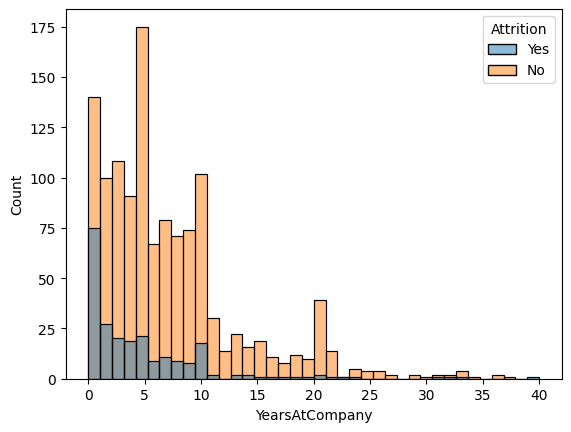

In [26]:
sns.histplot(hue=df.Attrition,x=df.YearsAtCompany)
plt.show()

Freshers have higher range of attrition. Employees who work from 1-10 years are more likely to leave.

# 1.ANALYSIS OF DISCRETE DATA WRT TARGET COLUMN

In [27]:
discrete_col=[]
for column in df.columns:
  if df[column].dtype=="int64" and len(df[column].unique())<=10:
    discrete_col.append(column)

In [28]:
discrete_col

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [29]:
df2=df[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]

# 1. IMPACT OF ENVIRONMENT AND JOB SATISFACTION ON ATTRITION

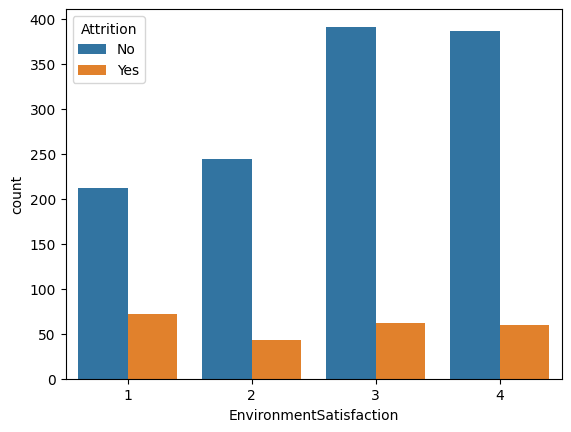

In [30]:
sns.countplot(hue=df.Attrition,x=df.EnvironmentSatisfaction)
plt.show()

Greater the environment satisfaction of employees, lesser the attrition "yes".

# 2. JOB LEVEL VS ATTRITION

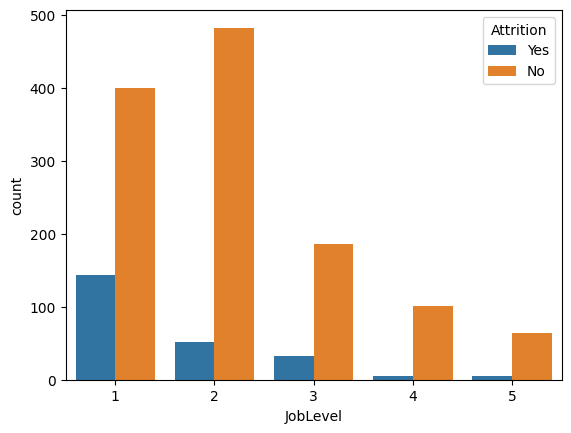

In [31]:
sns.countplot(hue=df.Attrition,x=df.JobLevel)
plt.show()

Increase in job level, decrease in the amount of attrition.

# 3. JOB INVOLVEMENT VS ATTRITION

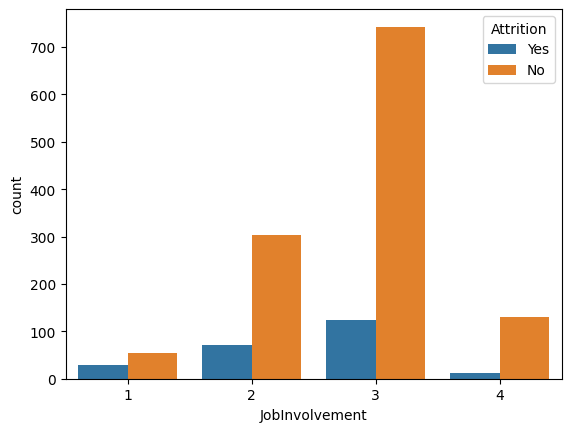

In [32]:
sns.countplot(hue=df.Attrition,x=df.JobInvolvement)
plt.show()

The employees who are more invloved in job are more likely to quit. somehow there are some employees who are not involved more also likely to quit.

# 4. IMPACT OF STOCK OPTION LEVEL ON ATTRITION

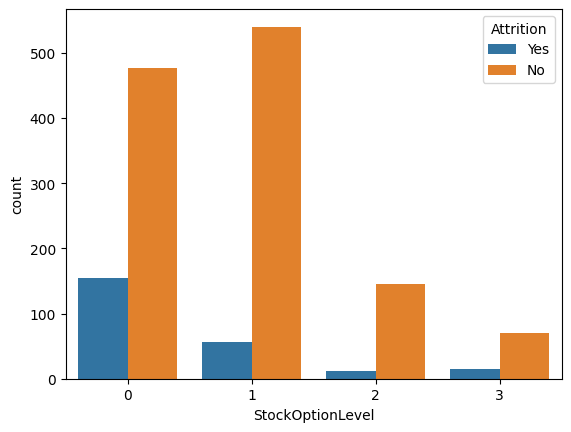

In [33]:
sns.countplot(hue=df.Attrition,x=df.StockOptionLevel)
plt.show()

For the employees who don't have stock option are more likely to quit.

# 5. PERFORMANCE RATE AND ATTRITION

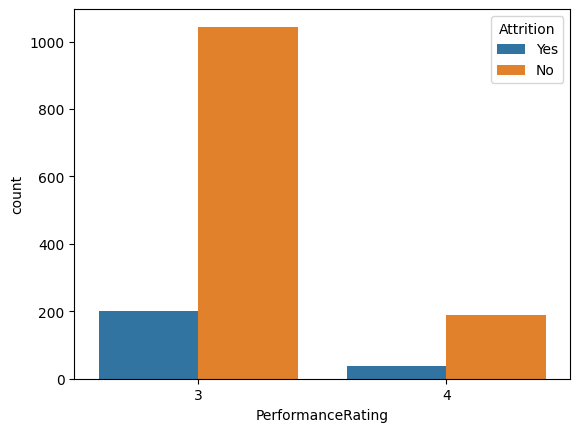

In [34]:
sns.countplot(hue=df.Attrition,x=df.PerformanceRating)
plt.show()


Most of the employees are moderately performed. However less performance rating are more likely to quit.

**Uni Variate numerical Feature Analysis**

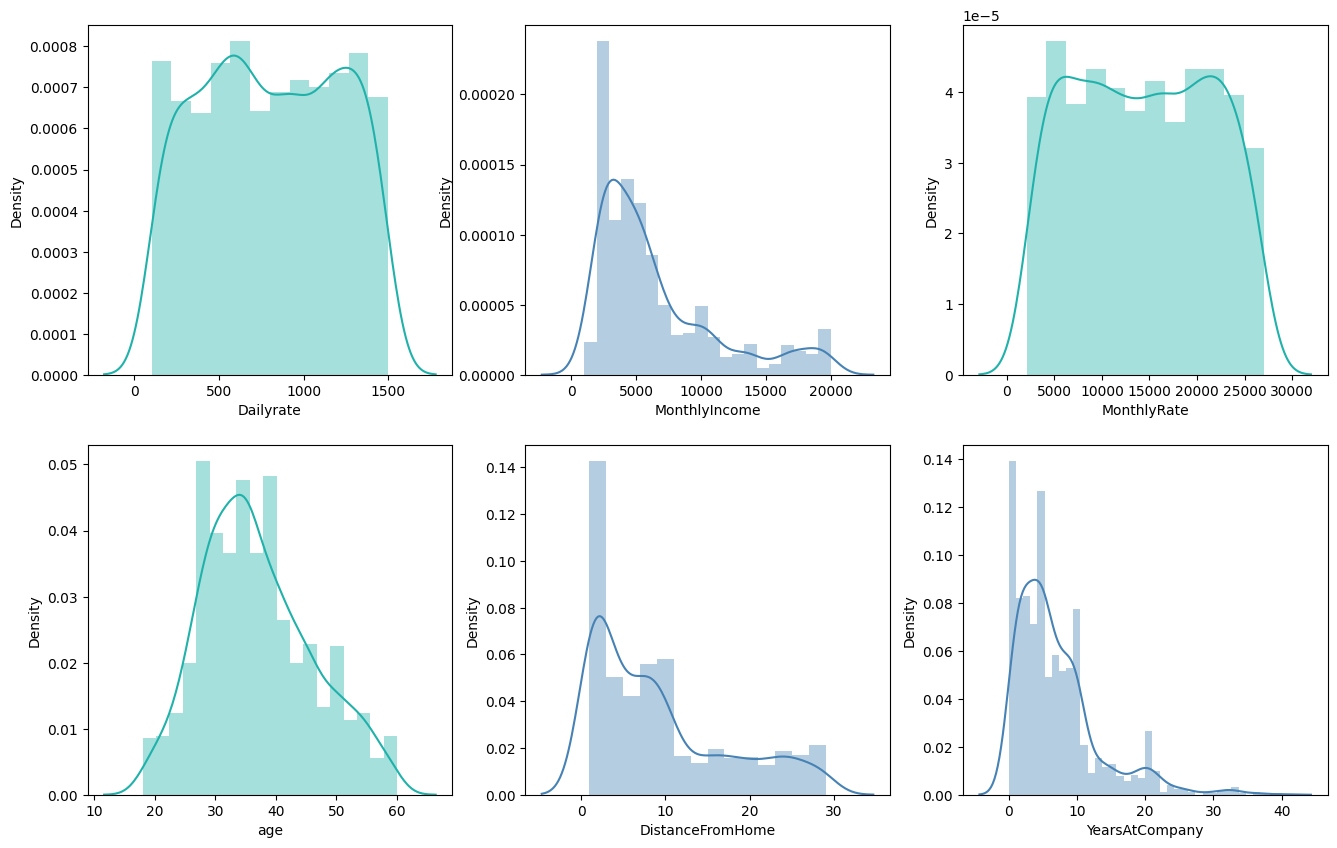

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.distplot(x=df['DailyRate'], kde=True,ax=axes[0,0],axlabel='Dailyrate',color='lightseagreen')
sns.distplot(x=df['MonthlyIncome'], kde=True,ax=axes[0,1],axlabel='MonthlyIncome',color='steelblue')
sns.distplot(x=df['MonthlyRate'], kde=True,ax=axes[0,2],axlabel='MonthlyRate',color='lightseagreen')
sns.distplot(x=df['Age'], kde=True,ax=axes[1,0],axlabel='age',color='lightseagreen')
sns.distplot(x=df['DistanceFromHome'], kde=True,ax=axes[1,1],axlabel='DistanceFromHome',color='steelblue')
sns.distplot(x=df['YearsAtCompany'], kde=True,ax=axes[1,2],axlabel='YearsAtCompany',color='steelblue')
plt.show()

Above plot shows that MonthlyIncome, DistanceFromHome, YearsAtCompany features have outlier which will be handled later section in the notebook

**Bi Variate Catagorical Feature Analysis**

In [39]:
pal_7 = sns.color_palette("GnBu",n_colors=7)

In [40]:
cata=[]
feat = df.drop(['Attrition'],axis=1)
# for colu in X.columns:
for colu in feat:
    pa =df[colu].value_counts().count()
    if (pa>1) & (pa<10) :
        cata.append(colu)

<function matplotlib.pyplot.show(close=None, block=None)>

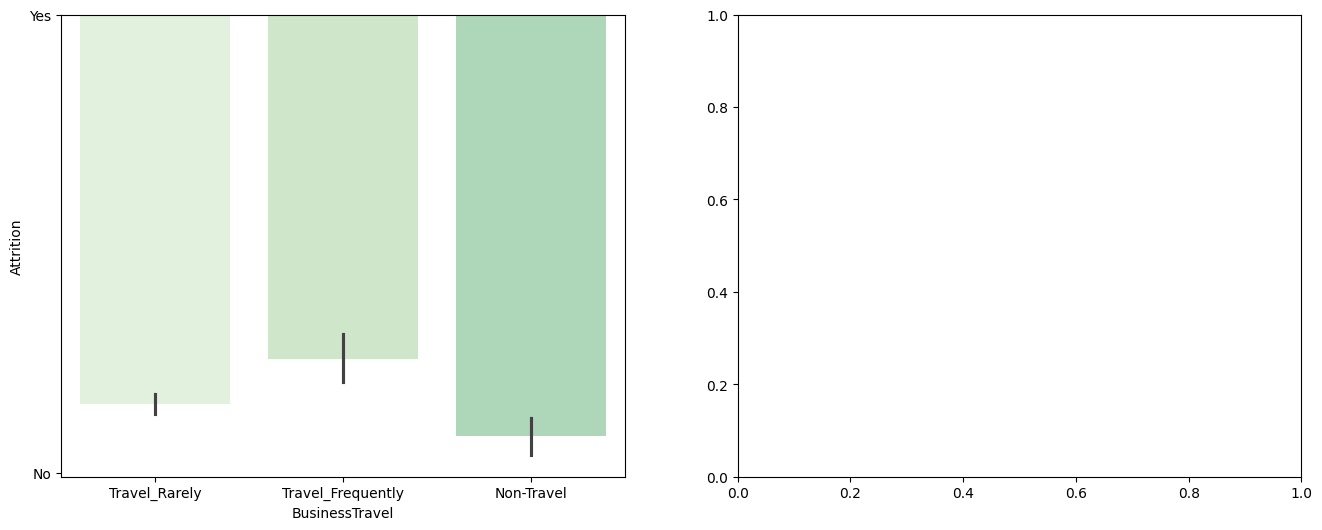

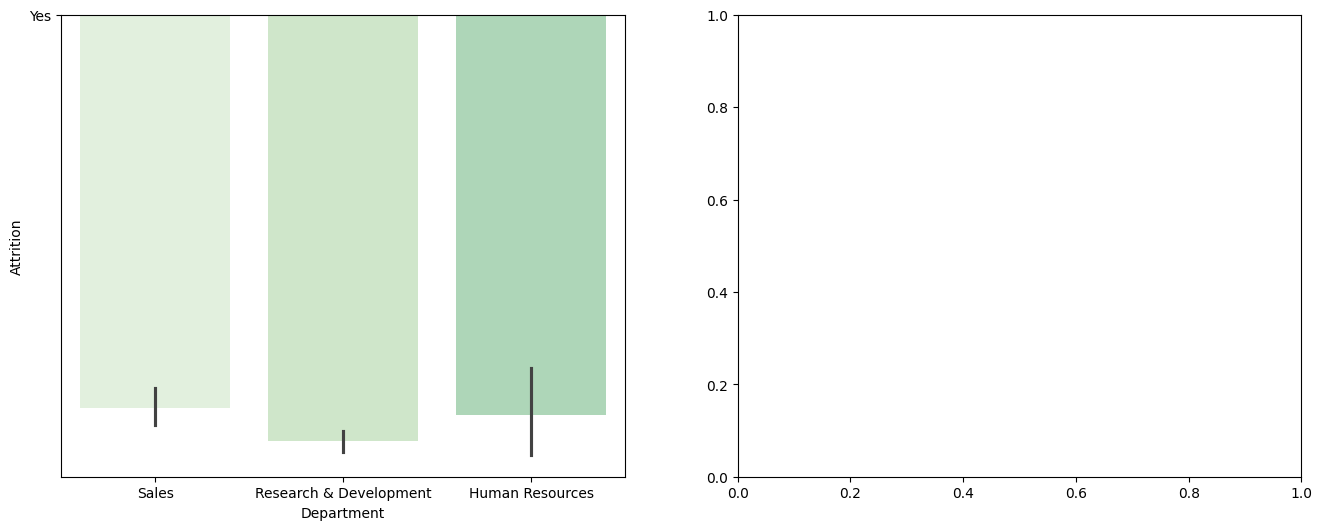

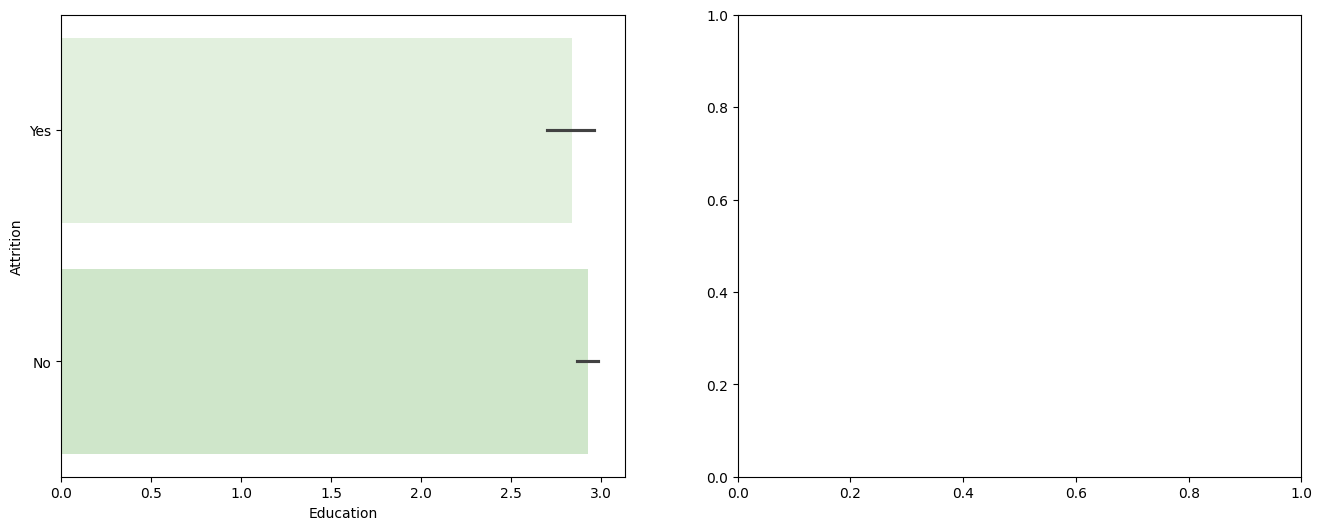

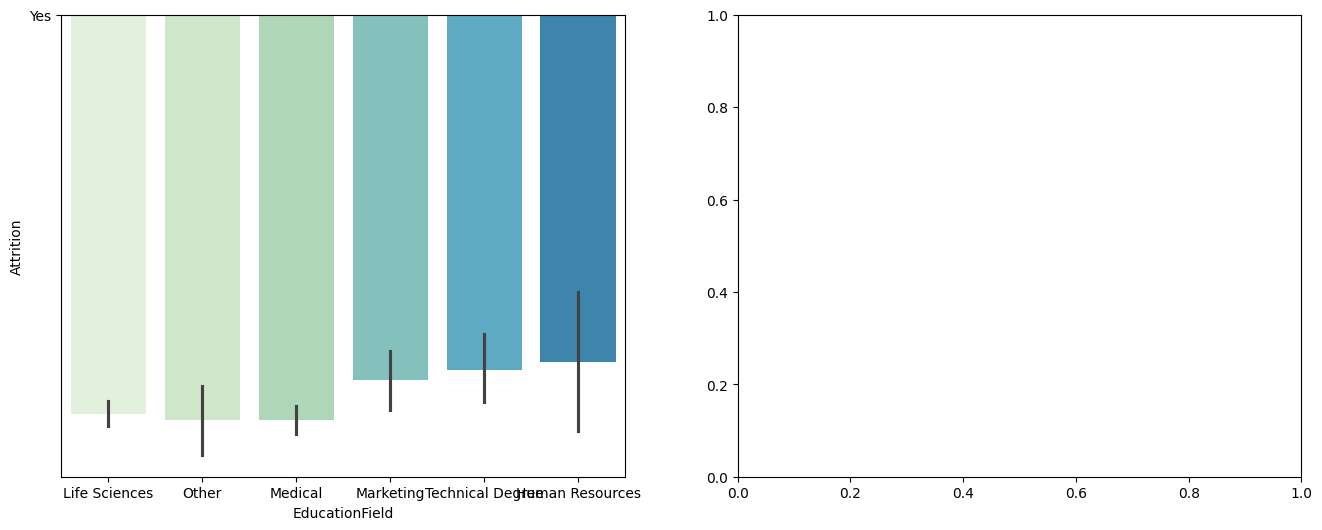

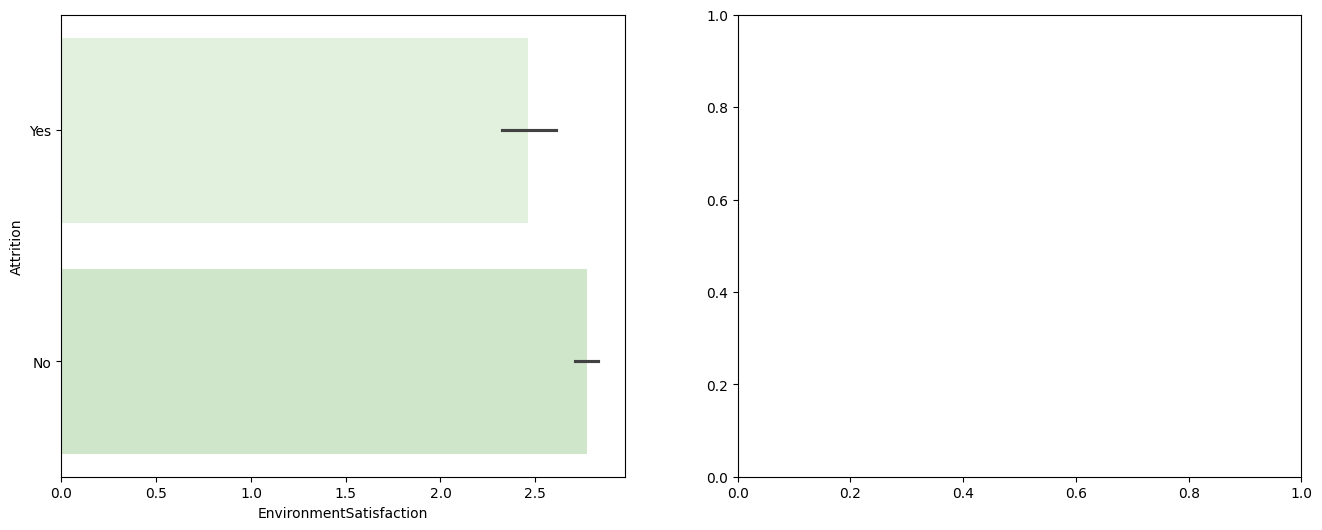

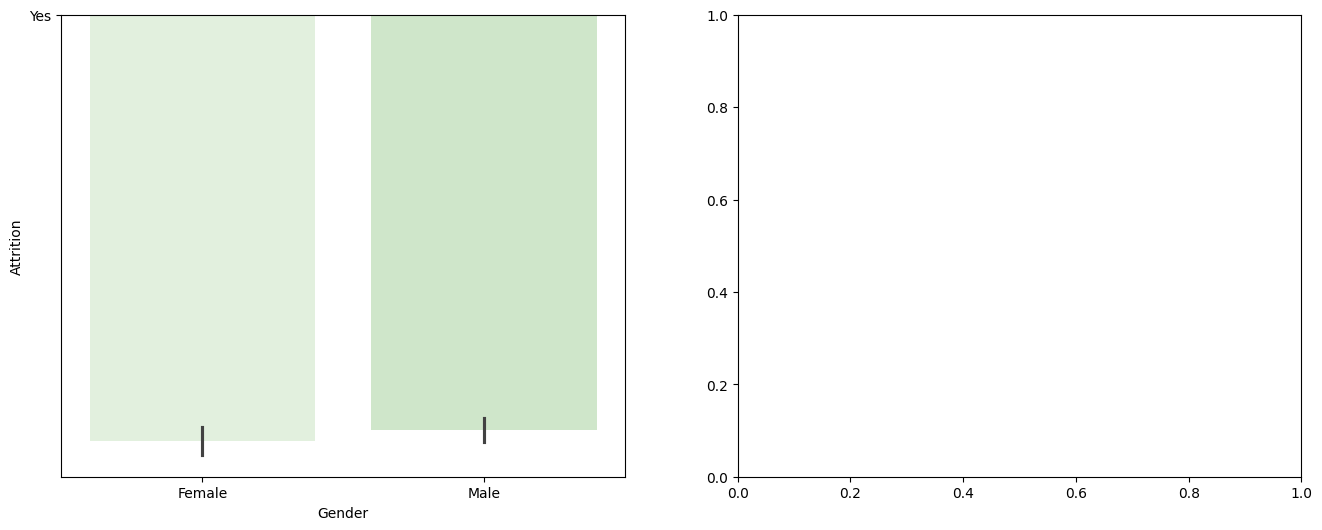

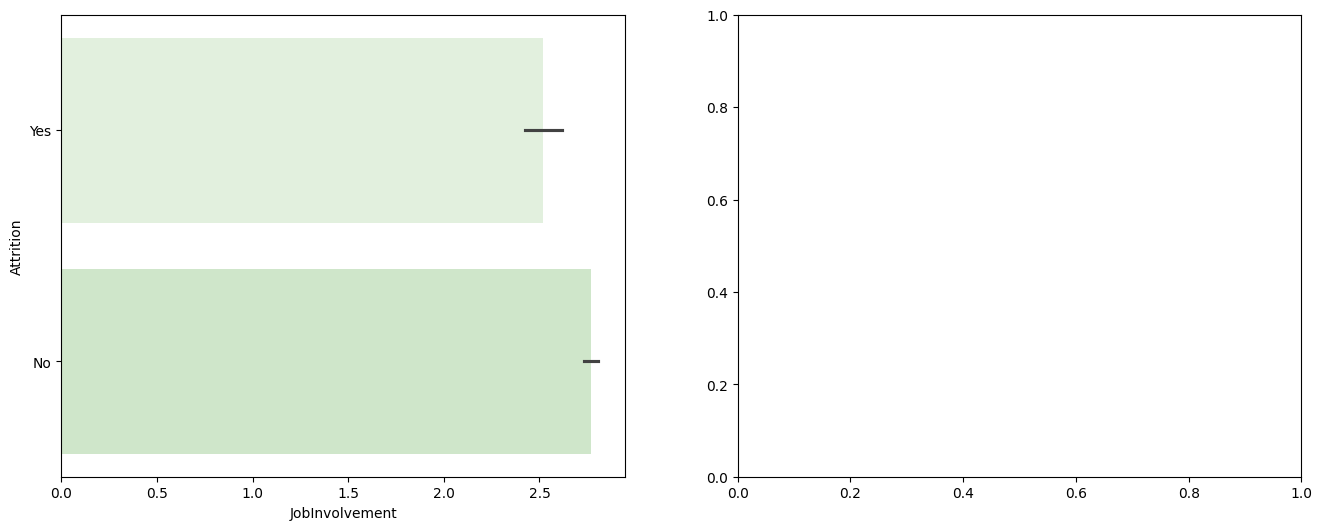

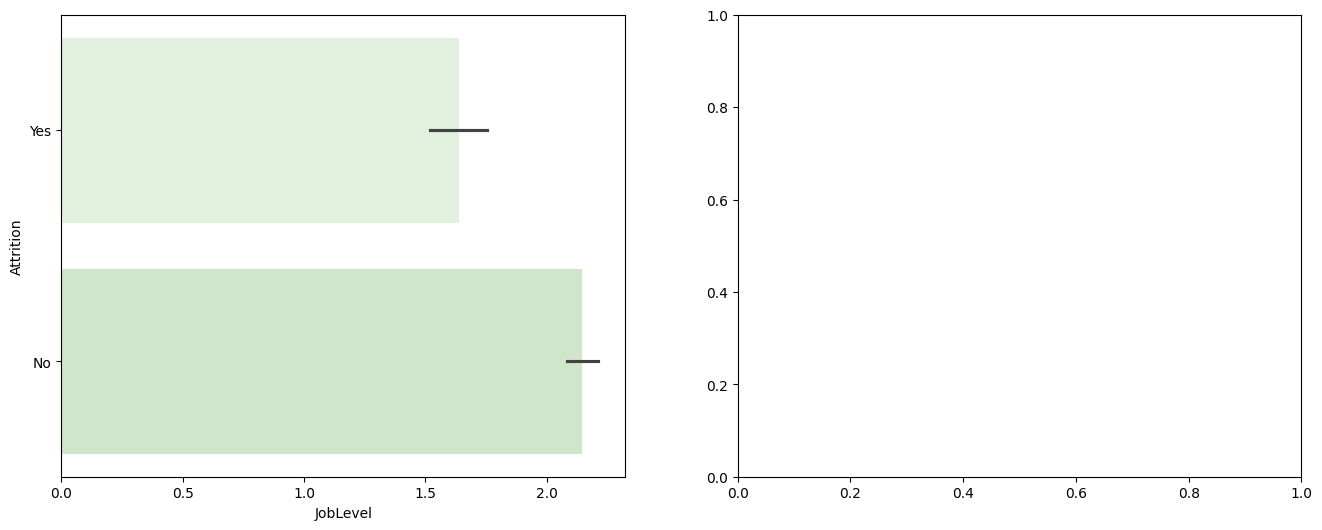

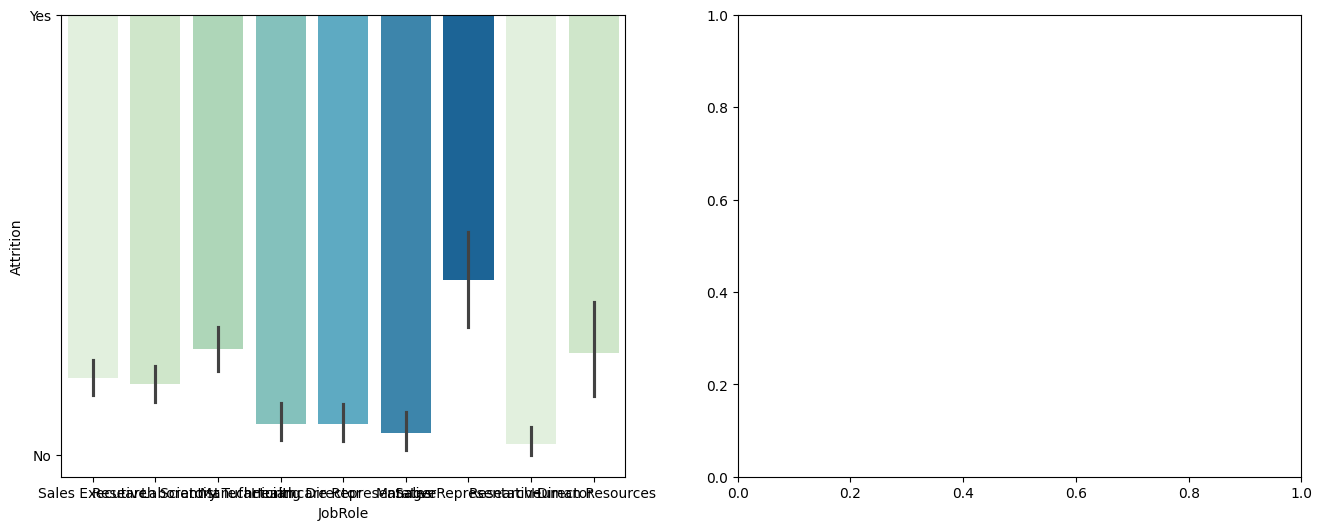

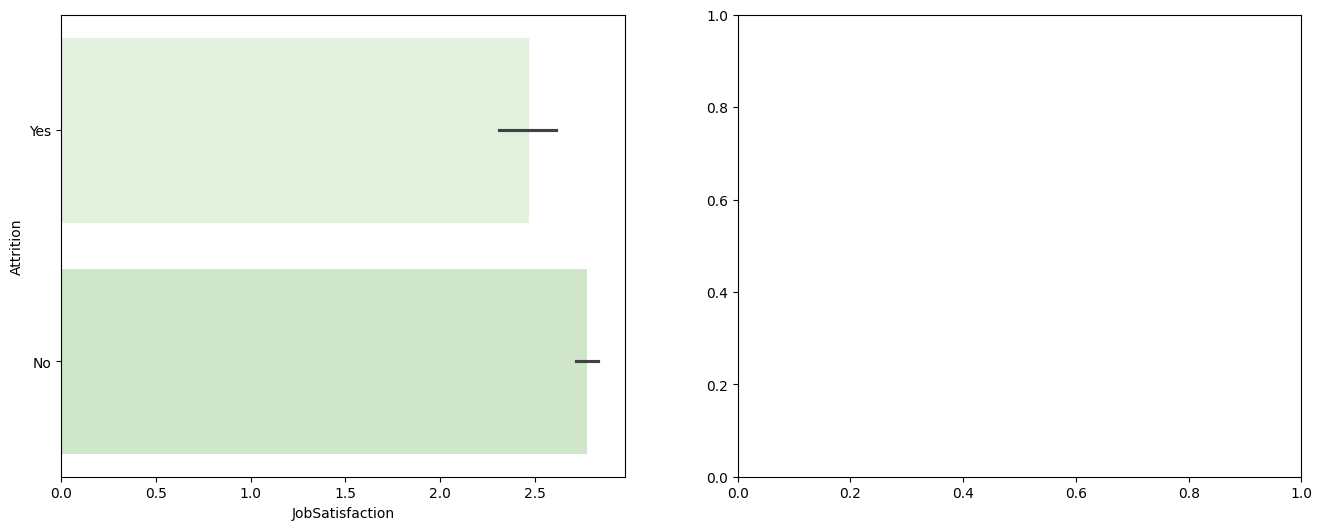

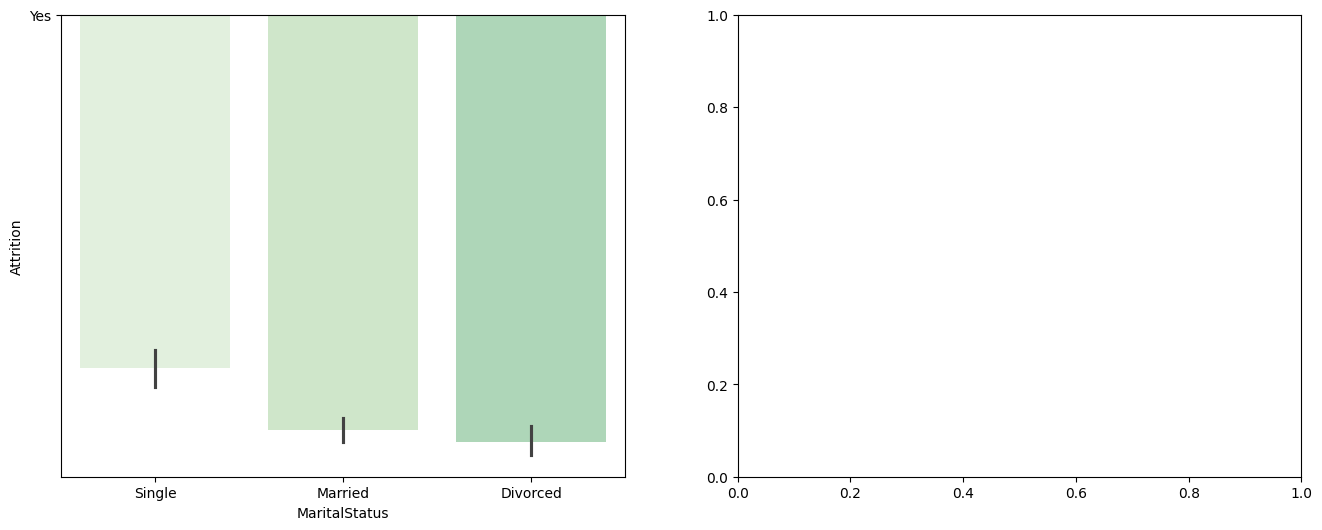

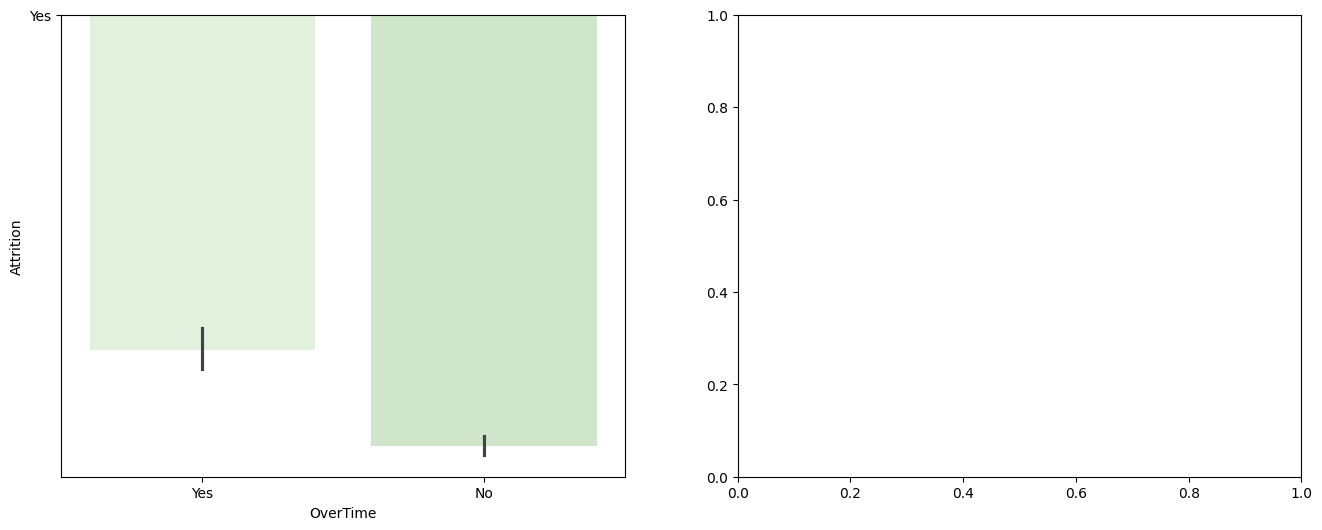

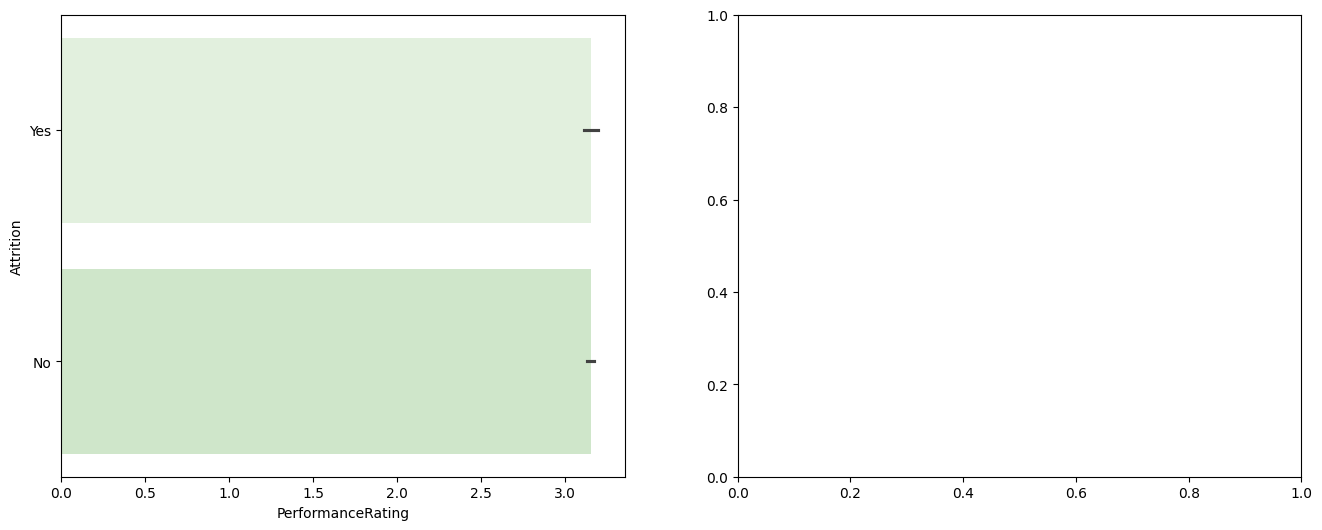

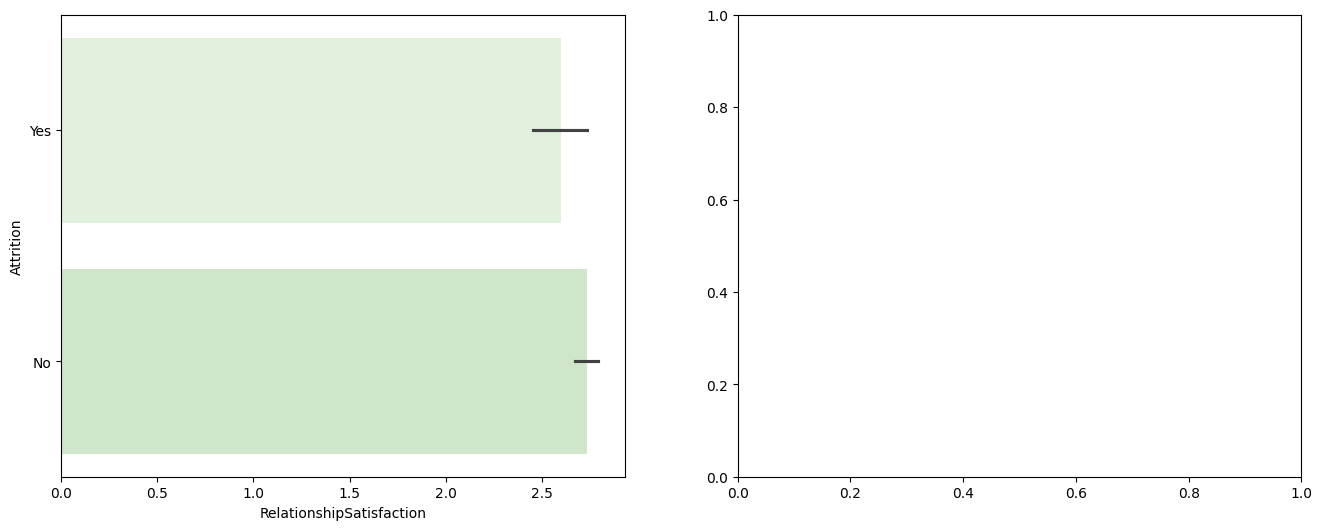

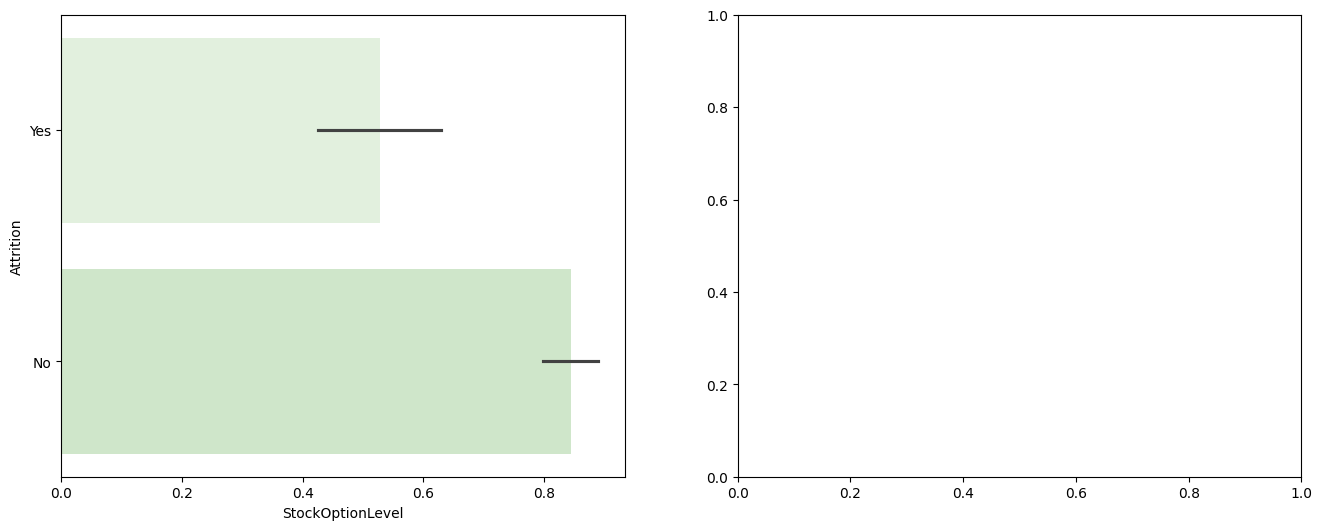

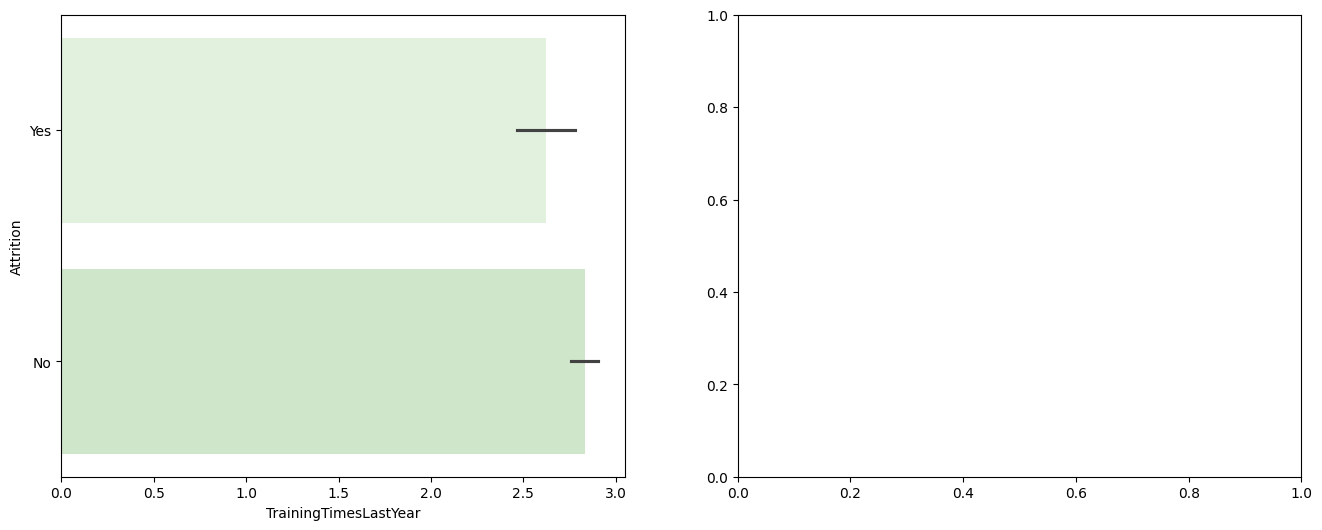

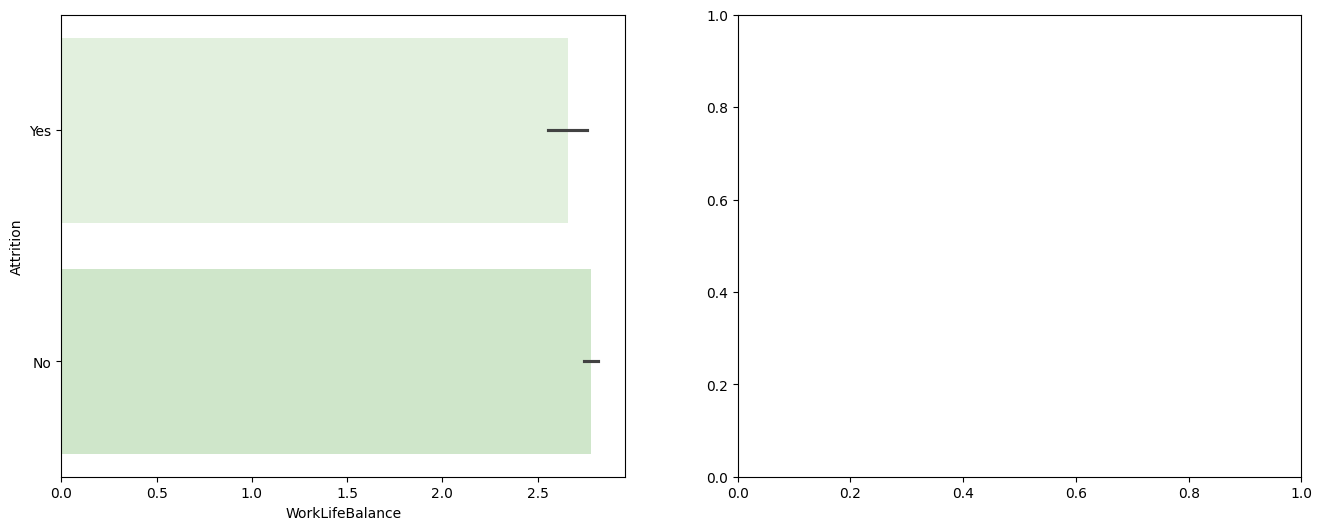

In [48]:
for col in cata:
    fig, axes = plt.subplots(1,2, figsize=(16, 6))
    sns.barplot(x=col,y='Attrition',data=df,ax=axes[0],palette=pal_7)
    st ="No of Attrition in "+col
    (col,df,st,"Count",axes[1],'Attrition')
plt.show

**Multi Variate Feature Analysis**

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

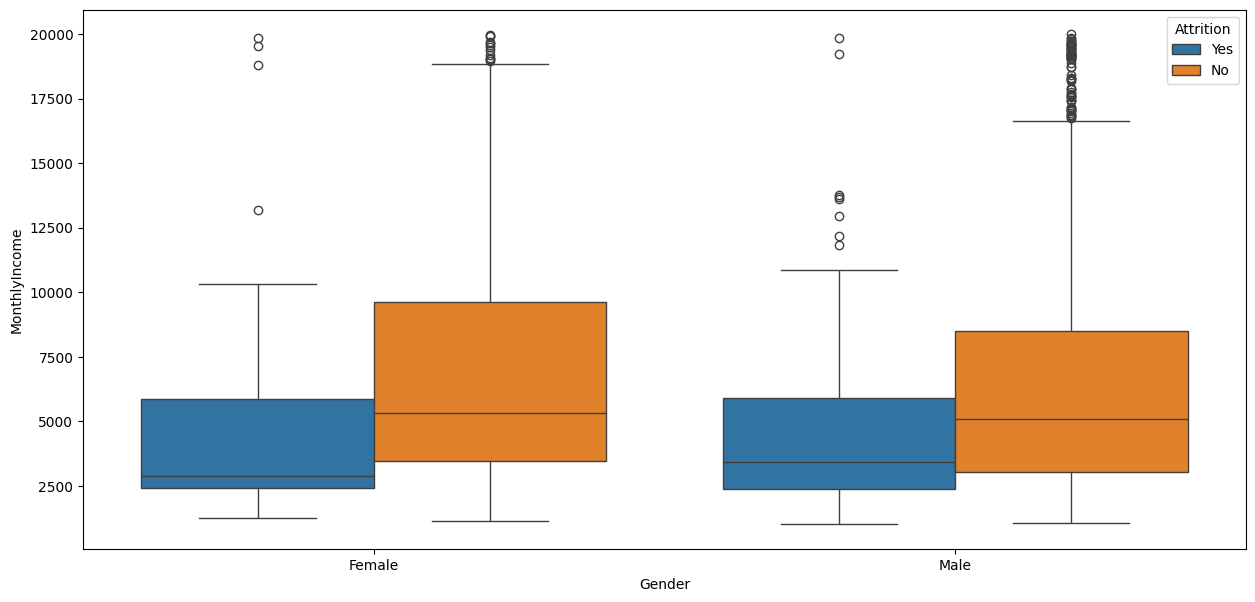

In [51]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Gender", y="MonthlyIncome", data=df,hue='Attrition')

<Axes: xlabel='Gender', ylabel='Age'>

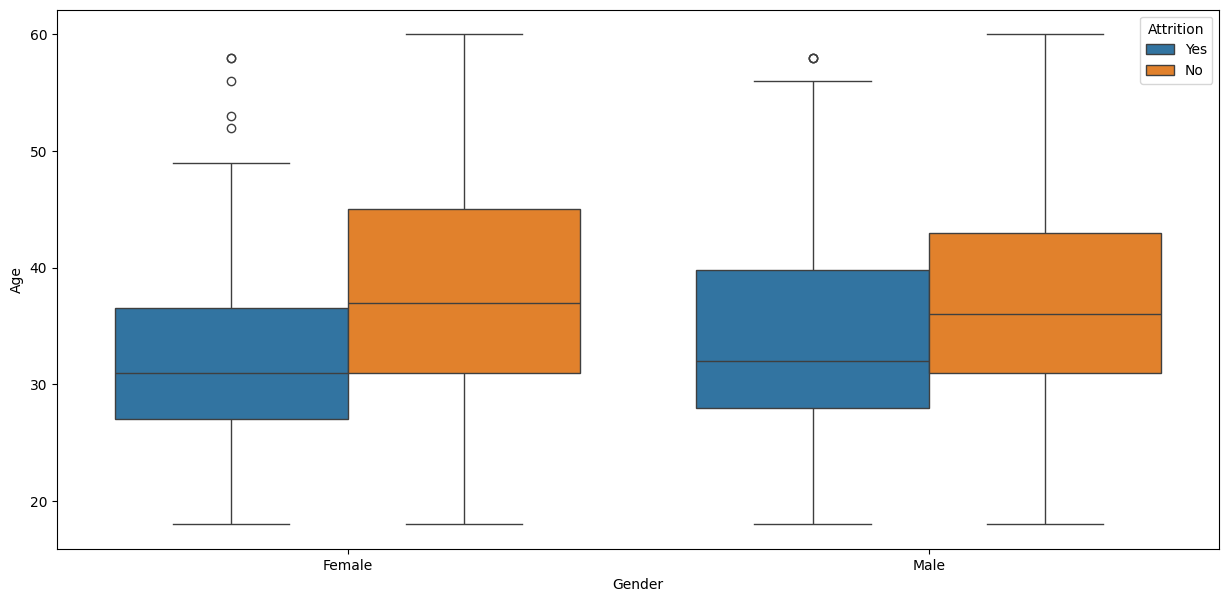

In [52]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Gender", y="Age", data=df,hue='Attrition')

**Transform target to numeric values (0,1)**

In [53]:
# Changing feature 'Attrition as a 'target with 1 as 'Yes'
df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)

In [54]:
df=df.drop(['EmployeeNumber'],axis=1)

In [55]:
df.groupby('Gender')['Attrition'].mean().to_frame()

,Attrition
Gender,
Female,0.147959
Male,0.170068


In [56]:
df.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Gender Attrition               
Female 0            7019.429142
       1            4769.735632
Male   0            6704.964481
       1            4797.160000

In [57]:
df.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
Gender Attrition               
Female 0                 5329.0
       1                 2886.0
Male   0                 5075.0
       1                 3407.5

In [58]:
df.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

Age
Gender Attrition           
Female 0          38.155689
       1          32.574713
Male   0          37.154372
       1          34.206667

Above analysis confirms that Attrition rate of male is a bit higher than female
MonthlyIncome rate, Age is almost equal for both Gender.
Therefore, we can conclude that Gender does not have much influence for Employee Attrition.**

# DATA PRE-PROCESSING

In [59]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [60]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

# Data pre-processing:

In [61]:
Y=df[['Attrition']]
X=df.drop(['Attrition'],axis=1)

In [62]:
def unique_level(m):
    m = m.value_counts().count()
    return m
feature_val_count= pd.DataFrame(X.apply(lambda m: unique_level(m)))
feature_val_count.columns=['uni_level']
feat_level = feature_val_count.loc[feature_val_count['uni_level']>1]
feat_level_index = feat_level.index
X = X.loc[:,feat_level_index]

**Separate feature into numerical and categorical **

In [63]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [64]:
feature_level_val = pd.DataFrame(num.nunique())
feature_level_val.columns = ['unique_level']

In [65]:
# All catagorical column with numical data
cat_feat = feature_level_val[feature_level_val['unique_level']<=20]
cat_fet_index = cat_feat.index
cat_column = num.loc[:,cat_fet_index]
cat_column.columns

Index(['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [66]:
# All numerical column after separating
num_feat = feature_level_val[feature_level_val['unique_level']>20]
num_fet_index = num_feat.index
numerical = num.loc[:,num_fet_index]
numerical.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'],
      dtype='object')

In [69]:
categorical = pd.concat([char,cat_column],axis=1,join='inner')

**Outlier Analysis of Numerical Features**

In [67]:
numerical.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,7.780782,6.126525
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


# Capping and Flooring of outliers

In [68]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [70]:
numerical=numerical.apply(lambda x : outlier_cap(x))

In [71]:
numerical.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,11.268707,6.980272
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,7.710507,6.004901
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


**Feature Selection - Numerical Features**

<Axes: >

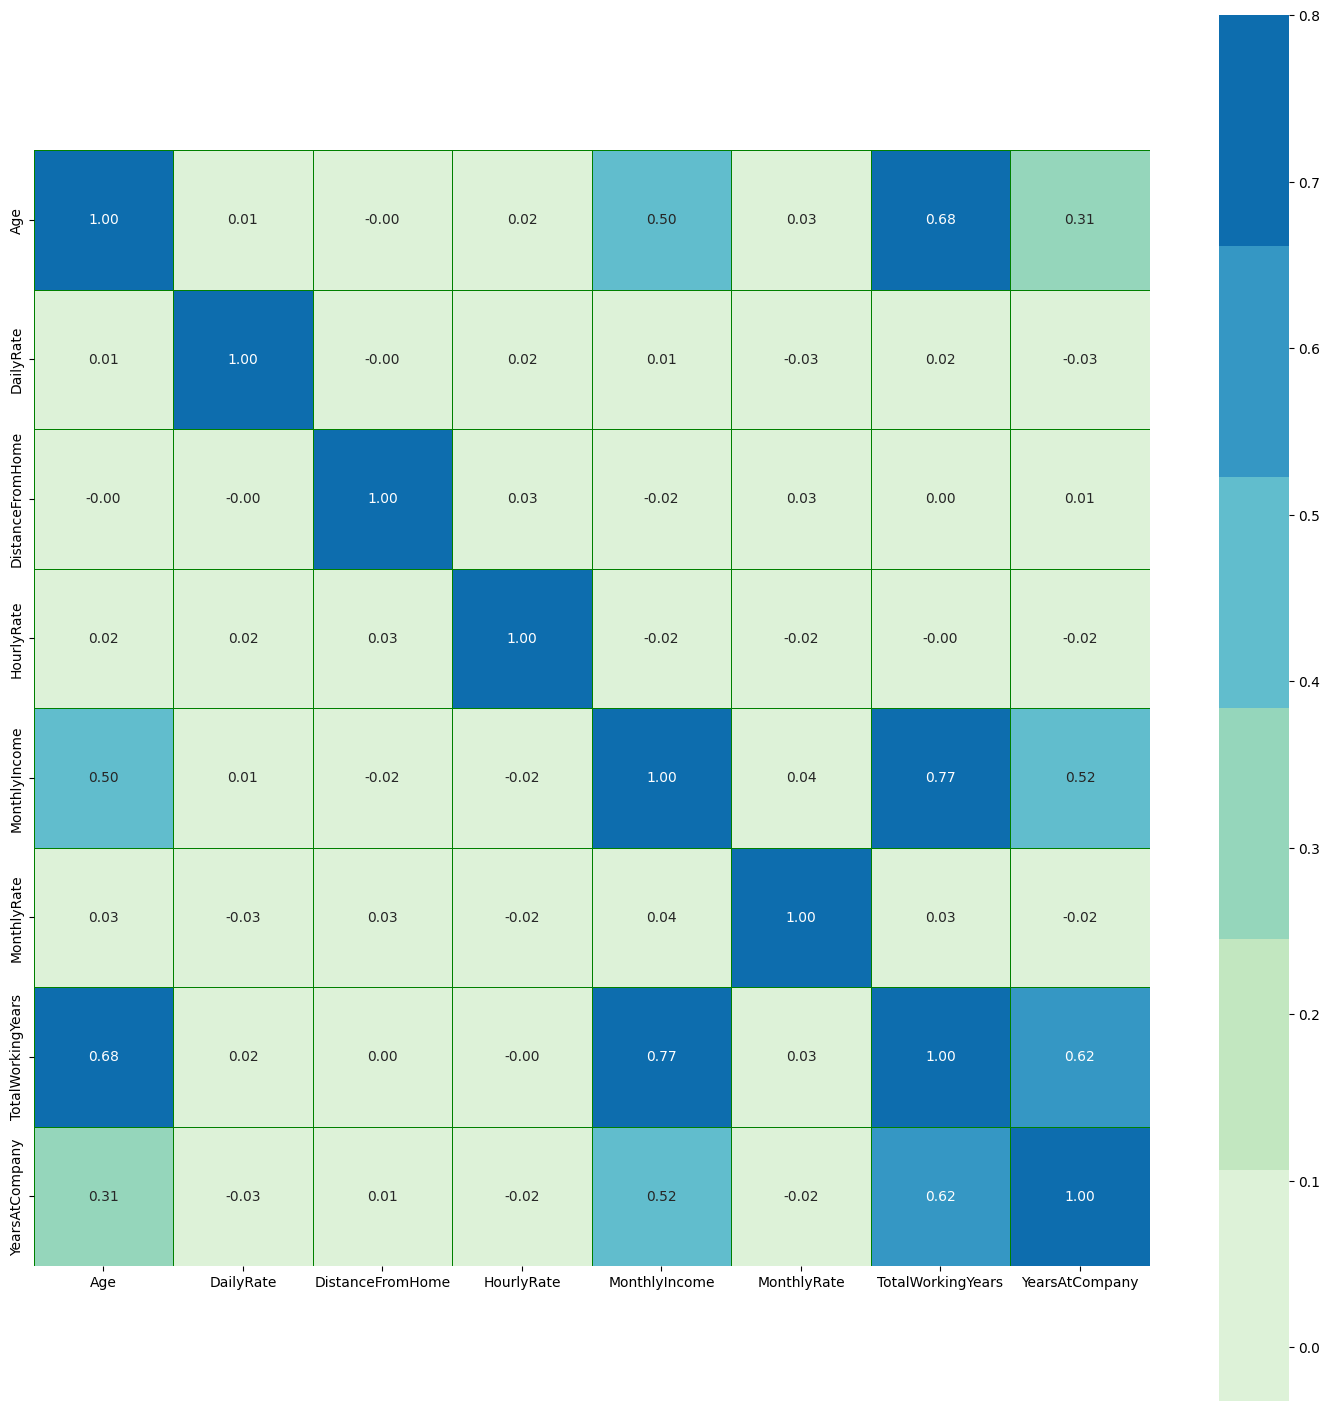

In [72]:
plt.figure(figsize=(18,18))
cmap =sns.color_palette("GnBu",n_colors=6)
cor =numerical.corr()
sns.heatmap(cor,annot=True,vmax=0.8,cmap=cmap,fmt='.2f',linecolor='green',linewidths=0.7,square=True)

In [73]:
#  function for removing corelated feature
def correlMatrix(data,thres):
    correlated_features = set()
    correlation_matrix = data.corr()
    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > thres:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

In [74]:
correlated_feat = correlMatrix(numerical,0.75)
correlated_feat

{'TotalWorkingYears'}

In [75]:
numerical.drop(correlated_feat,axis=1,inplace=True)

**Feature Selection - Categorical Features**

In [76]:
categorical.drop(columns=['Gender','PerformanceRating'],axis=1,inplace=True)

In [77]:
categorical = categorical.astype(object)

In [ ]:
categorical.head()

In [ ]:
catag_dum = pd.get_dummies(categorical,drop_first = True)
catag_dum.shape

In [81]:
# K Best for Selecting Categorical Features using k=20
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(catag_dum, Y)

cols = selector.get_support(indices=True)
X_ca= catag_dum.iloc[:,cols]

In [82]:
# joining all inpendent features
X_all=pd.concat([numerical,X_ca],axis=1,join='inner')

In [83]:
X_all.shape

(1470, 27)

**Imbalace dataset to balance dataset**

In [84]:
from imblearn.over_sampling import  RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority',random_state=1)

X_s,Y_s = ros.fit_resample(X_all, Y)

**Split the Dataset for Training & Testing**

In [85]:
X_train,x_test,y_train,y_test=train_test_split(X_s.values,Y_s.values,test_size=0.2,random_state=1)

In [89]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [90]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",x_test.shape)
print("Attrition Rate in Training Data",y_train.mean())
print("Attrition Rate in Testing Data",y_test.mean())

Shape of Training Data (1972, 27)
Shape of Testing Data (494, 27)
Attrition Rate in Training Data 0.4949290060851927
Attrition Rate in Testing Data 0.520242914979757


**Data Transformation using Standardrization**

In [92]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

**Model Building**

In [93]:
def modelEval(xtr,ytr,xte,yte,model):

    model.fit(xtr,ytr)

    # Prediction for Test and Train Dataset
    test_pred=model.predict(xte)
    train_pred =model.predict(xtr)

    tpr_score = metrics.precision_score(ytr, train_pred)
    trc_score = metrics.recall_score(ytr, train_pred)
    tac_score =metrics.accuracy_score(ytr,train_pred)
    print("For Training Dataset.")
    print(f'Accuracy: {tac_score:.2f}, Precision: {tpr_score:.2f}, Recall: {trc_score:.2f}')
    print("===============================")
    pr_score = metrics.precision_score(yte, test_pred)
    rc_score = metrics.recall_score(yte, test_pred)
    ac_score = metrics.accuracy_score(yte, test_pred)
    print("===============================")
    print("===============================")
    print("For Testing Dataset")
    print("===============================")
    print("F1:",metrics.f1_score(yte, test_pred))
    print(f'Accuracy: {ac_score:.2f}, Precision: {pr_score:.2f}, Recall: {rc_score:.2f}')
    print("===============================")
#     cmap =sns.color_palette("GnBu")
    metrics.plot_confusion_matrix(model,xte,yte,cmap='GnBu')
    print(classification_report(yte,test_pred))

**Decision Tree Model**

In [94]:
print(np.unique(y_train))
print(np.unique(y_test))

[0. 1.]
[0. 1.]


In [98]:
from sklearn.metrics import confusion_matrix

Model Name : Decision Tree


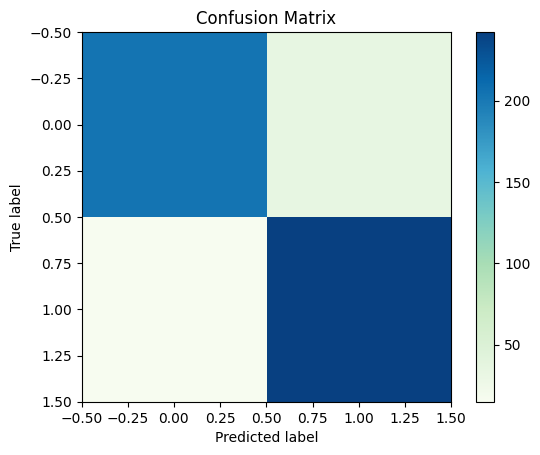

In [103]:
model_dt = DecisionTreeClassifier(random_state=11,max_depth=10, criterion = "gini")
print("Model Name : Decision Tree")
# Compute confusion matrix
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, model_dt.predict(x_test))

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='GnBu')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Hyper-Parameter Optimization using GridSearchCV for Decision Tree Model**


In [105]:
dt_model2 = DecisionTreeClassifier(random_state=3)

In [106]:
#  selcting best parameter using GridSearchCV
start = time.time()

param_dist = {'max_depth': [7,8,9],
              'min_samples_split':[9,11,15],
              'min_samples_leaf':[9,11,13],
              'criterion': ['gini']}

cv_rf = GridSearchCV(estimator=dt_model2, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 9}
Time taken in grid search:  6.56


In [107]:
# initializing best parameter using grid search
criti = cv_rf.best_params_['criterion']
sample_split=cv_rf.best_params_['min_samples_split']
sample_leaf = cv_rf.best_params_['min_samples_leaf']
depth = cv_rf.best_params_['max_depth']

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
#  model with best parameter
dt_model2.set_params(criterion = criti,max_depth=depth,min_samples_leaf=sample_leaf,min_samples_split=sample_split)

print("Model Name : Decision Tree with Hyper parameter :")
modelEval(X_train,y_train,x_test,y_test,dt_model2)


Model Name : Decision Tree with Hyper parameter :
Accuracy: 0.8259109311740891


**K-Nearest Neighbours Classifier model**

**Detection of Optimal Value for K Neighnours**

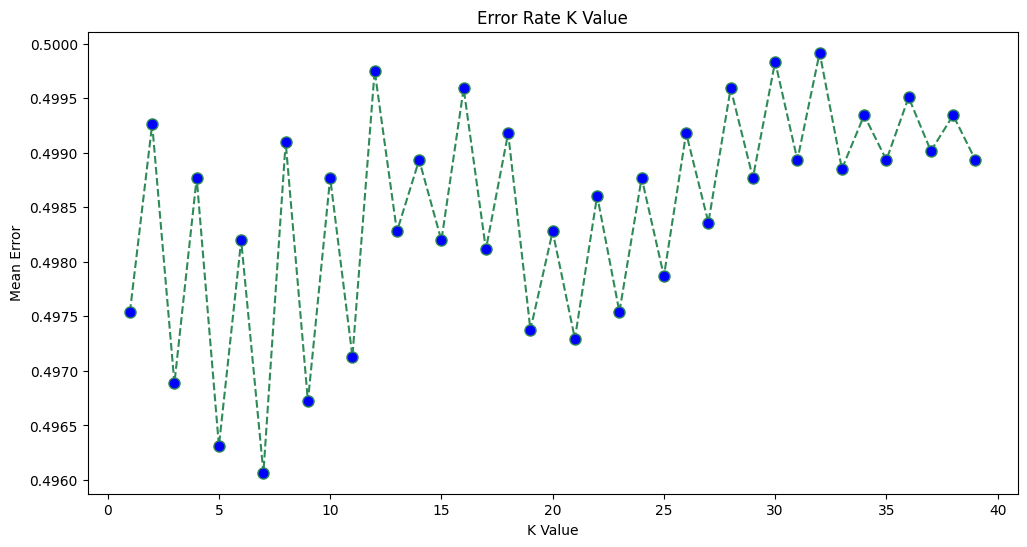

In [124]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='seagreen', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [132]:
from sklearn.metrics import accuracy_score

def modelEval(X_train, y_train, x_test, y_test, classifier):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print("Accuracy:", accuracy)

# Assuming you have defined X_train, y_train, X_test, y_test
# and imported KNeighborsClassifier as you did
# Then you can call the function like this:

classifier = KNeighborsClassifier(n_neighbors=5)
print("Model Name: KNeighborsClassifier")
modelEval(X_train, y_train, x_test, y_test, classifier)

Model Name: KNeighborsClassifier
Accuracy: 0.8157894736842105


**Random Forest Classifier**

In [133]:
rf = RandomForestClassifier(n_estimators=50,random_state=1,max_depth=6)
print("Model Name : Random Forest")
modelEval(X_train,y_train,x_test,y_test,rf)

Model Name : Random Forest
Accuracy: 0.8481781376518218


**Hyper-Parameter Optimization using GridSearchCV for Random Forest Classifier**

In [134]:
fit_rf = RandomForestClassifier(random_state=1)

In [135]:
start = time.time()

param_dist = {'max_depth': [7,8,9],
              'max_features': ['auto'],
              'criterion': ['gini','entropy'],
              'min_samples_split':[8,9,11,12],
              'min_samples_leaf':[8,9,11,13]}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train.ravel())
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 8}
Time taken in grid search:  344.11


In [136]:
# initializing best parameter using grid search
criti = cv_rf.best_params_['criterion']
sample_split=cv_rf.best_params_['min_samples_split']
sample_leaf = cv_rf.best_params_['min_samples_leaf']
depth = cv_rf.best_params_['max_depth']
# Set best parameters given by grid search
fit_rf.set_params(n_estimators=200,bootstrap=True,criterion = criti,
                  max_features = 'auto',
                  max_depth = depth,
                  min_samples_leaf=sample_leaf,
                  min_samples_split=sample_split)

RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=9,
                       min_samples_split=8, n_estimators=200, random_state=1)

In [137]:
print("Model Name : Random Forest hyper parameter optimization")
modelEval(X_train,y_train,x_test,y_test,fit_rf)

Model Name : Random Forest hyper parameter optimization
Accuracy: 0.8522267206477733


**SVC Model**

In [138]:
svc_model = SVC(kernel='rbf', gamma='scale')
print("Model Name : SVC")
modelEval(X_train,y_train,x_test,y_test,svc_model)
svc_model.fit(X_train, y_train.ravel())

Model Name : SVC
Accuracy: 0.8582995951417004


SVC()

Thus we have obtained lots of insights from the HR data.